In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as mn
import plotly.graph_objects as go

In [11]:
from matplotlib.ticker import FuncFormatter
import matplotlib.ticker as ticker
import matplotlib.patches as mpatches
import matplotlib.patheffects as PathEffects
%matplotlib inline

import calendar
import plotly as pt
from plotly import graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff
from pylab import*

import plotly.graph_objects as go
from nltk.corpus import stopwords

import geopandas as gpd
import geoplot
from geopy.geocoders import Nominatim

import warnings
warnings.filterwarnings('ignore')

In [13]:
df = pd.read_csv('C:/Users/aditya/Desktop/Internship/Prodigy Infotech/Task 5/US_Accidents_March23.csv')

In [14]:
df.head()

ID   Source  Severity           Start_Time             End_Time  \
0  A-1  Source2         3  2016-02-08 05:46:00  2016-02-08 11:00:00   
1  A-2  Source2         2  2016-02-08 06:07:59  2016-02-08 06:37:59   
2  A-3  Source2         2  2016-02-08 06:49:27  2016-02-08 07:19:27   
3  A-4  Source2         3  2016-02-08 07:23:34  2016-02-08 07:53:34   
4  A-5  Source2         2  2016-02-08 07:39:07  2016-02-08 08:09:07   

   Start_Lat  Start_Lng  End_Lat  End_Lng  Distance(mi)  ... Roundabout  \
0  39.865147 -84.058723      NaN      NaN          0.01  ...      False   
1  39.928059 -82.831184      NaN      NaN          0.01  ...      False   
2  39.063148 -84.032608      NaN      NaN          0.01  ...      False   
3  39.747753 -84.205582      NaN      NaN          0.01  ...      False   
4  39.627781 -84.188354      NaN      NaN          0.01  ...      False   

  Station   Stop Traffic_Calming Traffic_Signal Turning_Loop Sunrise_Sunset  \
0   False  False           False          False        False          Night   
1   False  False           False          False        False          Night   
2   False  False           False           True        False          Night   
3   False  False           False          False        False          Night   
4   False  False           False           True        False            Day   

  Civil_Twilight Nautical_Twilight Astronomical_Twilight  
0          Night             Night                 Night  
1          Night             Night                   Day  
2          Night               Day                   Day  
3            Day               Day                   Day  
4            Day               Day                   Day  

[5 rows x 46 columns]

In [15]:
df.tail()

ID   Source  Severity           Start_Time  \
1651114  A-1660968  Source2         2  2020-02-21 16:15:52   
1651115  A-1660969  Source2         2  2020-02-21 16:16:36   
1651116  A-1660970  Source2         2  2020-02-21 16:29:52   
1651117  A-1660971  Source2         2  2020-02-21 16:33:38   
1651118  A-1660972  Source2         2  2020-02-21 16:40:36   

                    End_Time  Start_Lat  Start_Lng  End_Lat  End_Lng  \
1651114  2020-02-21 17:15:26  37.529808 -77.503258      NaN      NaN   
1651115  2020-02-21 17:16:14  37.550152 -77.449516      NaN      NaN   
1651116  2020-02-21 16:59:39  35.870861 -78.580482      NaN      NaN   
1651117  2020-02-21 17:33:17  37.509308 -77.481270      NaN      NaN   
1651118  2020-02-21 17:40:21  37.372551 -77.615829      NaN      NaN   

         Distance(mi)  ... Roundabout Station   Stop Traffic_Calming  \
1651114           0.0  ...      False   False  False           False   
1651115           0.0  ...      False   False  False           False   
1651116           0.0  ...      False   False  False           False   
1651117           0.0  ...      False   False  False           False   
1651118           0.0  ...        NaN     NaN    NaN             NaN   

        Traffic_Signal Turning_Loop Sunrise_Sunset Civil_Twilight  \
1651114          False        False            Day            Day   
1651115          False        False            Day            Day   
1651116           True        False            Day            Day   
1651117          False        False            Day            Day   
1651118            NaN          NaN            NaN            NaN   

        Nautical_Twilight Astronomical_Twilight  
1651114               Day                   Day  
1651115               Day                   Day  
1651116               Day                   Day  
1651117               Day                   Day  
1651118               NaN                   NaN  

[5 rows x 46 columns]

In [17]:
df.columns

Index(['ID', 'Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat',
       'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Description',
       'Street', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [18]:
print('Number of columns: ', len(df.columns))
print('Number of rows: ', len(df))

Number of columns:  46
Number of rows:  1651119


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1651119 entries, 0 to 1651118
Data columns (total 46 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   ID                     1651119 non-null  object 
 1   Source                 1651119 non-null  object 
 2   Severity               1651119 non-null  int64  
 3   Start_Time             1651119 non-null  object 
 4   End_Time               1651119 non-null  object 
 5   Start_Lat              1651119 non-null  float64
 6   Start_Lng              1651119 non-null  float64
 7   End_Lat                0 non-null        float64
 8   End_Lng                0 non-null        float64
 9   Distance(mi)           1651119 non-null  float64
 10  Description            1651115 non-null  object 
 11  Street                 1649407 non-null  object 
 12  City                   1651079 non-null  object 
 13  County                 1651118 non-null  object 
 14  State             

In [20]:
df.describe()

Severity     Start_Lat     Start_Lng  End_Lat  End_Lng  \
count  1.651119e+06  1.651119e+06  1.651119e+06      0.0      0.0   
mean   2.322938e+00  3.606292e+01 -9.389026e+01      NaN      NaN   
std    5.265046e-01  4.857043e+00  1.681997e+01      NaN      NaN   
min    1.000000e+00  2.455480e+01 -1.244974e+02      NaN      NaN   
25%    2.000000e+00  3.302887e+01 -1.121132e+02      NaN      NaN   
50%    2.000000e+00  3.532567e+01 -8.760079e+01      NaN      NaN   
75%    3.000000e+00  4.005468e+01 -8.087847e+01      NaN      NaN   
max    4.000000e+00  4.899990e+01 -6.755331e+01      NaN      NaN   

       Distance(mi)  Temperature(F)  Wind_Chill(F)   Humidity(%)  \
count  1.651119e+06    1.624226e+06   1.174834e+06  1.621968e+06   
mean   2.120363e-01    6.280901e+01   5.902363e+01  6.614078e+01   
std    1.649496e+00    1.795515e+01   2.115890e+01  2.238219e+01   
min    0.000000e+00   -8.900000e+01  -8.900000e+01  1.000000e+00   
25%    0.000000e+00    5.110000e+01   4.400000e+01  5.000000e+01   
50%    0.000000e+00    6.500000e+01   6.300000e+01  6.900000e+01   
75%    0.000000e+00    7.600000e+01   7.500000e+01  8.500000e+01   
max    4.417500e+02    2.030000e+02   1.960000e+02  1.000000e+02   

       Pressure(in)  Visibility(mi)  Wind_Speed(mph)  Precipitation(in)  
count  1.628925e+06    1.620869e+06     1.536823e+06       1.150215e+06  
mean   2.955725e+01    9.091236e+00     7.581703e+00       9.731389e-03  
std    9.172242e-01    2.457265e+00     5.393772e+00       1.413824e-01  
min    1.200000e-01    0.000000e+00     0.000000e+00       0.000000e+00  
25%    2.934000e+01    1.000000e+01     4.600000e+00       0.000000e+00  
50%    2.984000e+01    1.000000e+01     7.000000e+00       0.000000e+00  
75%    3.001000e+01    1.000000e+01     1.000000e+01       0.000000e+00  
max    5.832000e+01    1.110000e+02     8.228000e+02       3.647000e+01

In [21]:
 len(df.select_dtypes(['int64','float64']).columns)

13

In [22]:
df.isnull().sum()

ID                             0
Source                         0
Severity                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Start_Lng                      0
End_Lat                  1651119
End_Lng                  1651119
Distance(mi)                   0
Description                    4
Street                      1712
City                          40
County                         1
State                          1
Zipcode                      262
Country                        1
Timezone                    1068
Airport_Code                2977
Weather_Timestamp          18701
Temperature(F)             26893
Wind_Chill(F)             476285
Humidity(%)                29151
Pressure(in)               22194
Visibility(mi)             30250
Wind_Direction             27482
Wind_Speed(mph)           114296
Precipitation(in)         500904
Weather_Condition          29349
Amenity                        1
Bump      

In [23]:
df.isna().sum()

ID                             0
Source                         0
Severity                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Start_Lng                      0
End_Lat                  1651119
End_Lng                  1651119
Distance(mi)                   0
Description                    4
Street                      1712
City                          40
County                         1
State                          1
Zipcode                      262
Country                        1
Timezone                    1068
Airport_Code                2977
Weather_Timestamp          18701
Temperature(F)             26893
Wind_Chill(F)             476285
Humidity(%)                29151
Pressure(in)               22194
Visibility(mi)             30250
Wind_Direction             27482
Wind_Speed(mph)           114296
Precipitation(in)         500904
Weather_Condition          29349
Amenity                        1
Bump      

In [24]:
df.isna().sum().sort_values(ascending=False) * 100. / len(df)

End_Lng                  100.000000
End_Lat                  100.000000
Precipitation(in)         30.337244
Wind_Chill(F)             28.846195
Wind_Speed(mph)            6.922336
Visibility(mi)             1.832091
Weather_Condition          1.777522
Humidity(%)                1.765530
Wind_Direction             1.664447
Temperature(F)             1.628774
Pressure(in)               1.344179
Weather_Timestamp          1.132626
Airport_Code               0.180302
Street                     0.103687
Sunrise_Sunset             0.099872
Civil_Twilight             0.099872
Nautical_Twilight          0.099872
Astronomical_Twilight      0.099872
Timezone                   0.064683
Zipcode                    0.015868
City                       0.002423
Description                0.000242
Country                    0.000061
Turning_Loop               0.000061
Traffic_Signal             0.000061
Traffic_Calming            0.000061
Stop                       0.000061
Station                    0

In [25]:
missing_data = df.isna().sum().sort_values(ascending=False) * 100. / len(df)

In [26]:
type(missing_data)

pandas.core.series.Series

<Axes: >

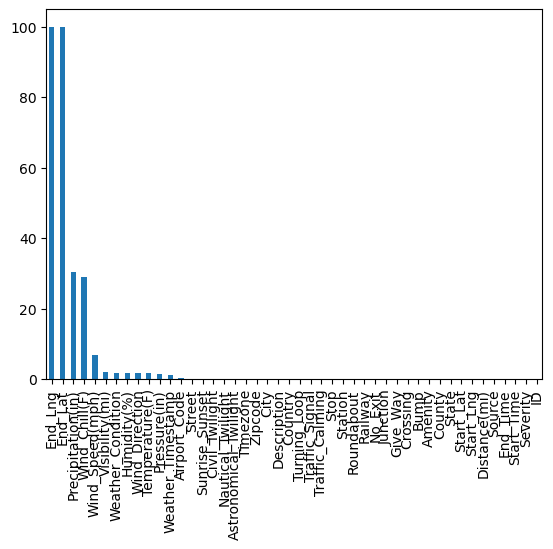

In [27]:
missing_data.plot(kind='bar')

<Axes: >

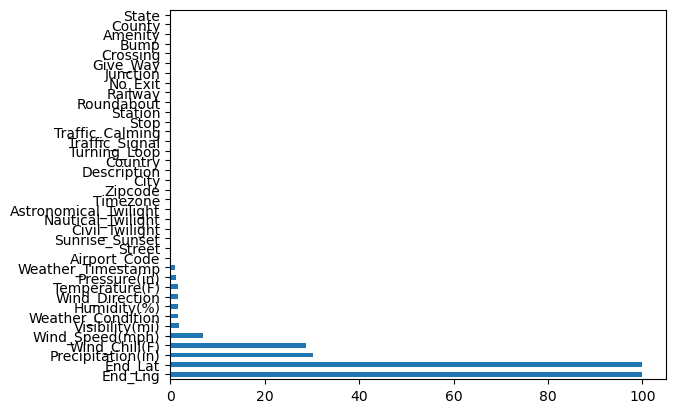

In [41]:
missing_data[missing_data!=0].plot(kind='barh')

In [54]:
df.columns

Index(['ID', 'Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat',
       'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Description',
       'Street', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [55]:
 df.City.unique()

array(['Dayton', 'Reynoldsburg', 'Williamsburg', ..., 'Mc Dade', 'Lyford',
       'Avon Lake'], dtype=object)

In [56]:
cities = df.City.unique() 
len(cities)

9920

In [57]:
cities_by_accident = df.City.value_counts()
cities_by_accident[:20]

City
Houston          57748
Dallas           41557
Los Angeles      36262
Austin           30333
Charlotte        30147
Atlanta          20480
Miami            17944
Nashville        16524
Orlando          16030
Raleigh          14770
Sacramento       13906
Baton Rouge      13777
Oklahoma City    12749
San Antonio      12367
Chicago          12237
Greenville       11682
Seattle          11508
San Diego        10906
Dayton           10814
San Jose          9736
Name: count, dtype: int64

In [58]:
import seaborn as sns
sns.set_style("darkgrid")

<Axes: xlabel='count', ylabel='Density'>

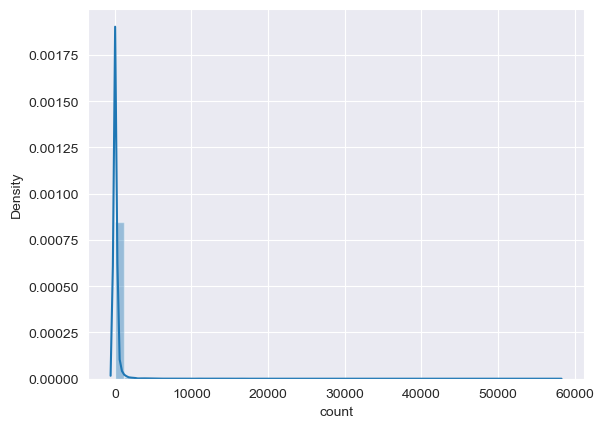

In [59]:
sns.distplot(cities_by_accident)

In [60]:
high_accident_cities = cities_by_accident[cities_by_accident >= 1000]
low_accident_cities = cities_by_accident[cities_by_accident < 1000]

In [61]:
len(high_accident_cities) / len(cities_by_accident)

0.026413953019457606

<Axes: xlabel='count', ylabel='Density'>

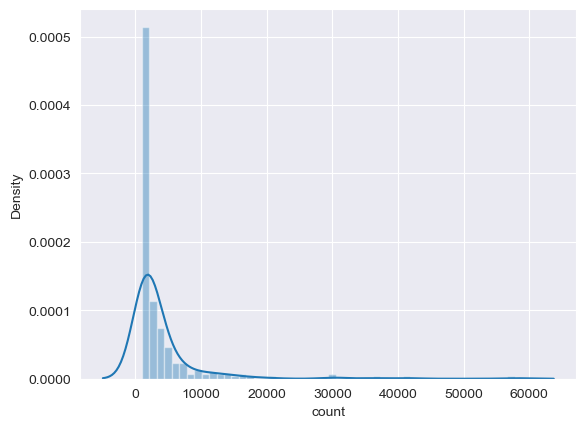

In [62]:
sns.distplot(high_accident_cities)

<Axes: xlabel='count', ylabel='Density'>

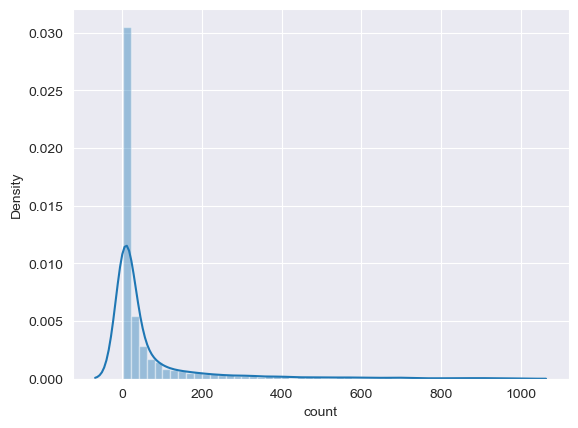

In [63]:
sns.distplot(low_accident_cities)

<Axes: xlabel='count', ylabel='Count'>

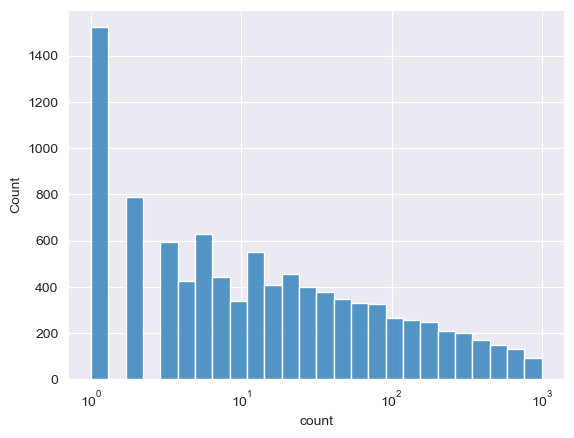

In [64]:
sns.histplot(low_accident_cities, log_scale=True)

<Axes: xlabel='count', ylabel='Count'>

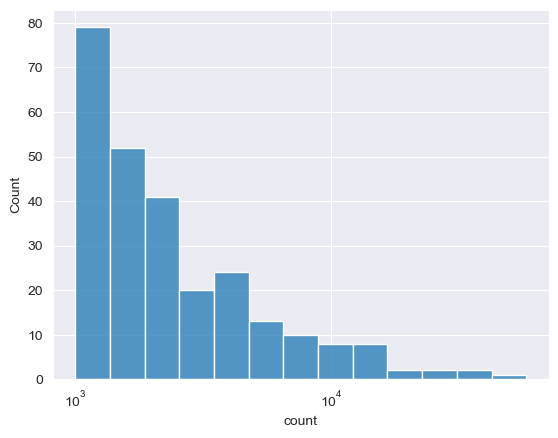

In [65]:
sns.histplot(high_accident_cities, log_scale=True)

In [66]:
cities_by_accident[cities_by_accident == 1]

City
Sheppard AFB    1
Scotland        1
Fayette City    1
Magee           1
Bruce Twp       1
               ..
Lake Wilson     1
Chinquapin      1
Glade Valley    1
Wood-Ridge      1
Avon Lake       1
Name: count, Length: 1522, dtype: int64

In [67]:
df.Start_Time[0]

'2016-02-08 05:46:00'

In [68]:
df.Start_Time = pd.to_datetime(df.Start_Time)

In [69]:
df.Start_Time[0]

Timestamp('2016-02-08 05:46:00')

In [70]:
df.Start_Time[0].day, df.Start_Time[0].month, df.Start_Time[0].year, df.Start_Time[0].hour, df.Start_Time[0].minute, df.Start_Time[0].second

(8, 2, 2016, 5, 46, 0)

In [71]:
df.Start_Time.dt.hour

0           5
1           6
2           6
3           7
4           7
           ..
1651114    16
1651115    16
1651116    16
1651117    16
1651118    16
Name: Start_Time, Length: 1651119, dtype: int32

<Axes: xlabel='Start_Time', ylabel='Count'>

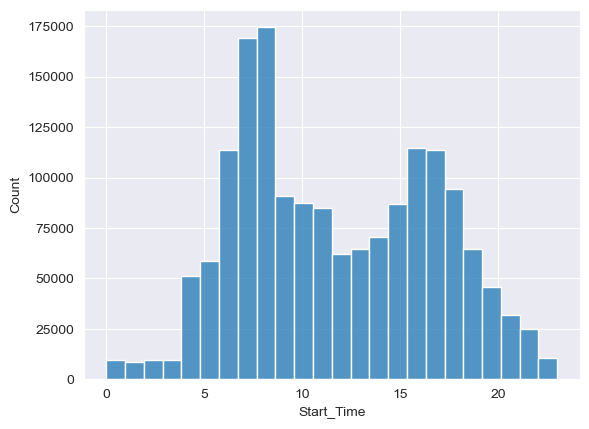

In [72]:
sns.histplot(df.Start_Time.dt.hour, bins=24)

<Axes: xlabel='Start_Time', ylabel='Density'>

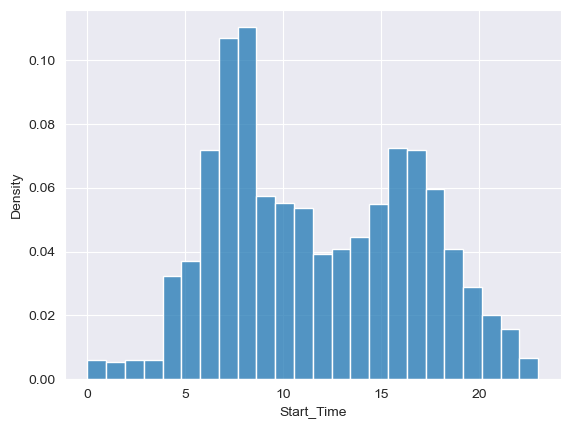

In [73]:
sns.histplot(df.Start_Time.dt.hour, bins=24, stat='density')

<Axes: xlabel='Start_Time', ylabel='Density'>

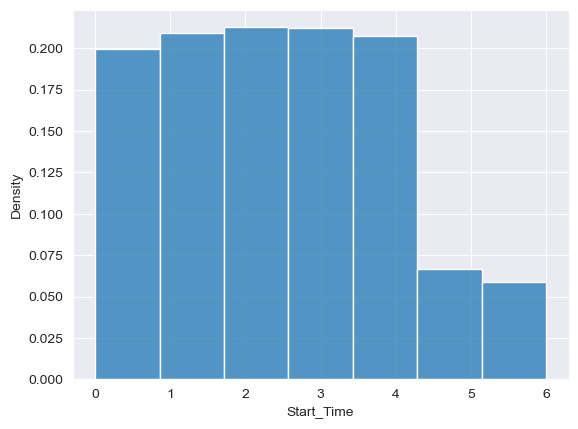

In [74]:
sns.histplot(df.Start_Time.dt.dayofweek, bins=7, stat='density')

In [75]:
sundays_start_time = df.Start_Time[df.Start_Time.dt.dayofweek == 6]

<Axes: xlabel='Start_Time', ylabel='Density'>

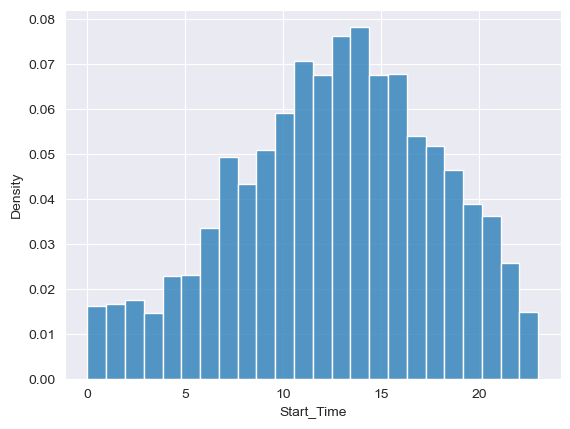

In [76]:
sns.histplot(sundays_start_time.dt.hour, bins=24, stat='density')

In [77]:
df.Start_Lat

0          39.865147
1          39.928059
2          39.063148
3          39.747753
4          39.627781
             ...    
1651114    37.529808
1651115    37.550152
1651116    35.870861
1651117    37.509308
1651118    37.372551
Name: Start_Lat, Length: 1651119, dtype: float64

In [79]:
df.Start_Lng

0         -84.058723
1         -82.831184
2         -84.032608
3         -84.205582
4         -84.188354
             ...    
1651114   -77.503258
1651115   -77.449516
1651116   -78.580482
1651117   -77.481270
1651118   -77.615829
Name: Start_Lng, Length: 1651119, dtype: float64

<Axes: xlabel='Start_Lng', ylabel='Start_Lat'>

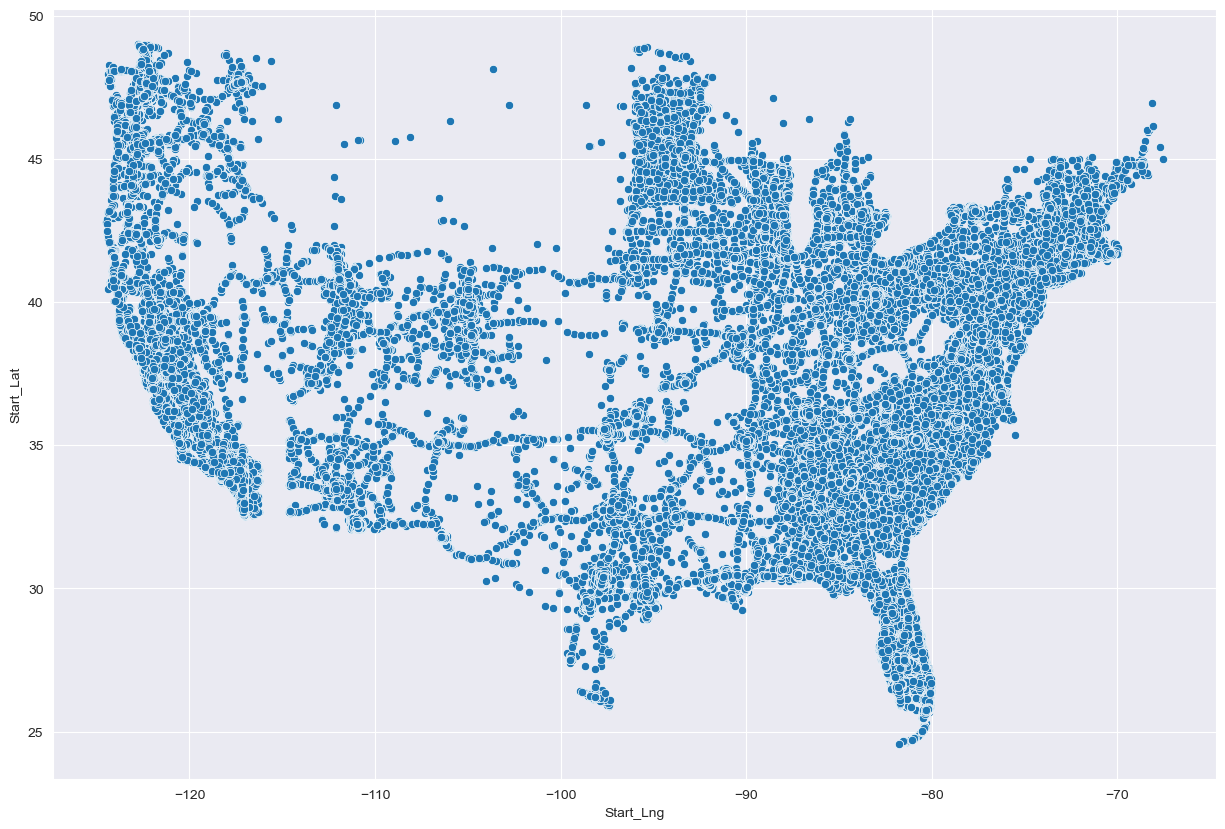

In [80]:
plt.figure(figsize=(15,10))
sns.scatterplot(y=df.Start_Lat, x=df.Start_Lng)

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1651119 entries, 0 to 1651118
Data columns (total 46 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   ID                     1651119 non-null  object        
 1   Source                 1651119 non-null  object        
 2   Severity               1651119 non-null  int64         
 3   Start_Time             1651119 non-null  datetime64[ns]
 4   End_Time               1651119 non-null  object        
 5   Start_Lat              1651119 non-null  float64       
 6   Start_Lng              1651119 non-null  float64       
 7   End_Lat                0 non-null        float64       
 8   End_Lng                0 non-null        float64       
 9   Distance(mi)           1651119 non-null  float64       
 10  Description            1651115 non-null  object        
 11  Street                 1649407 non-null  object        
 12  City                   16510

<Axes: xlabel='Start_Lng', ylabel='Start_Lat'>

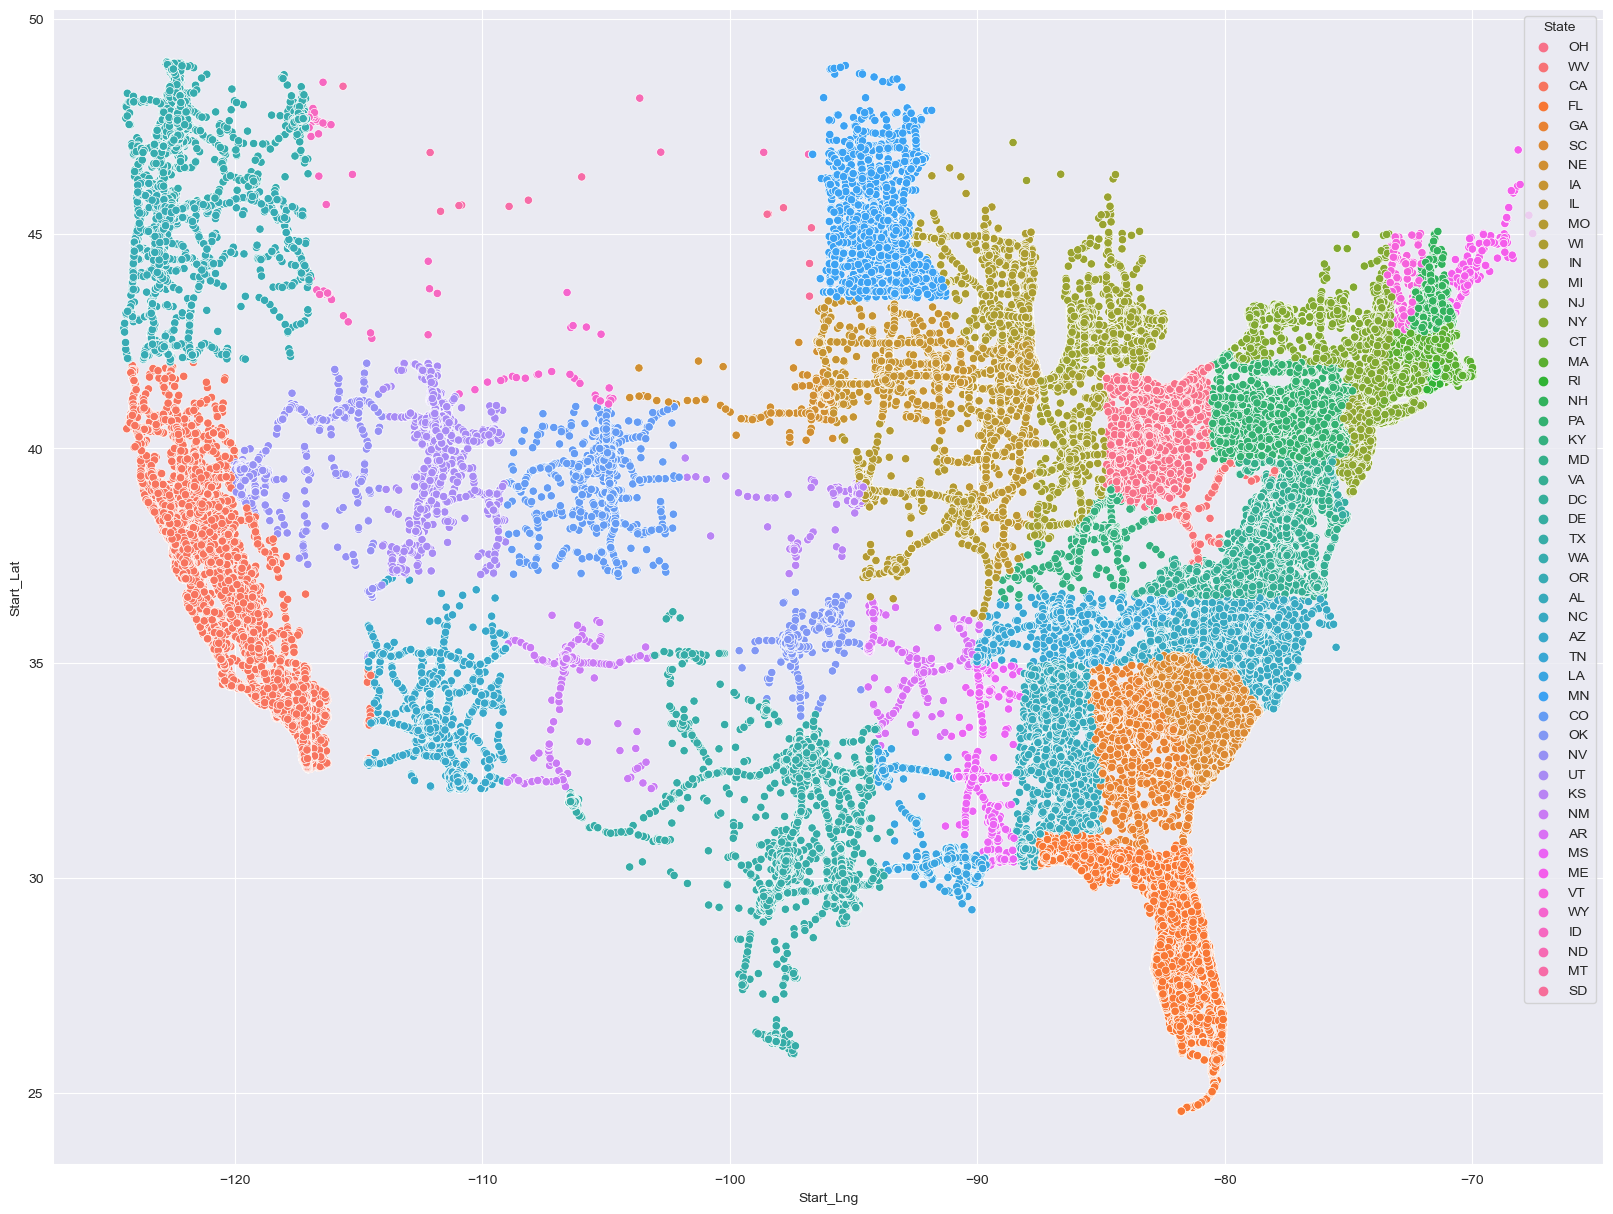

In [83]:
plt.figure(figsize=(20,15))
sns.scatterplot(y=df.Start_Lat, x=df.Start_Lng, hue=df.State)

<Axes: xlabel='Start_Lng', ylabel='Start_Lat'>

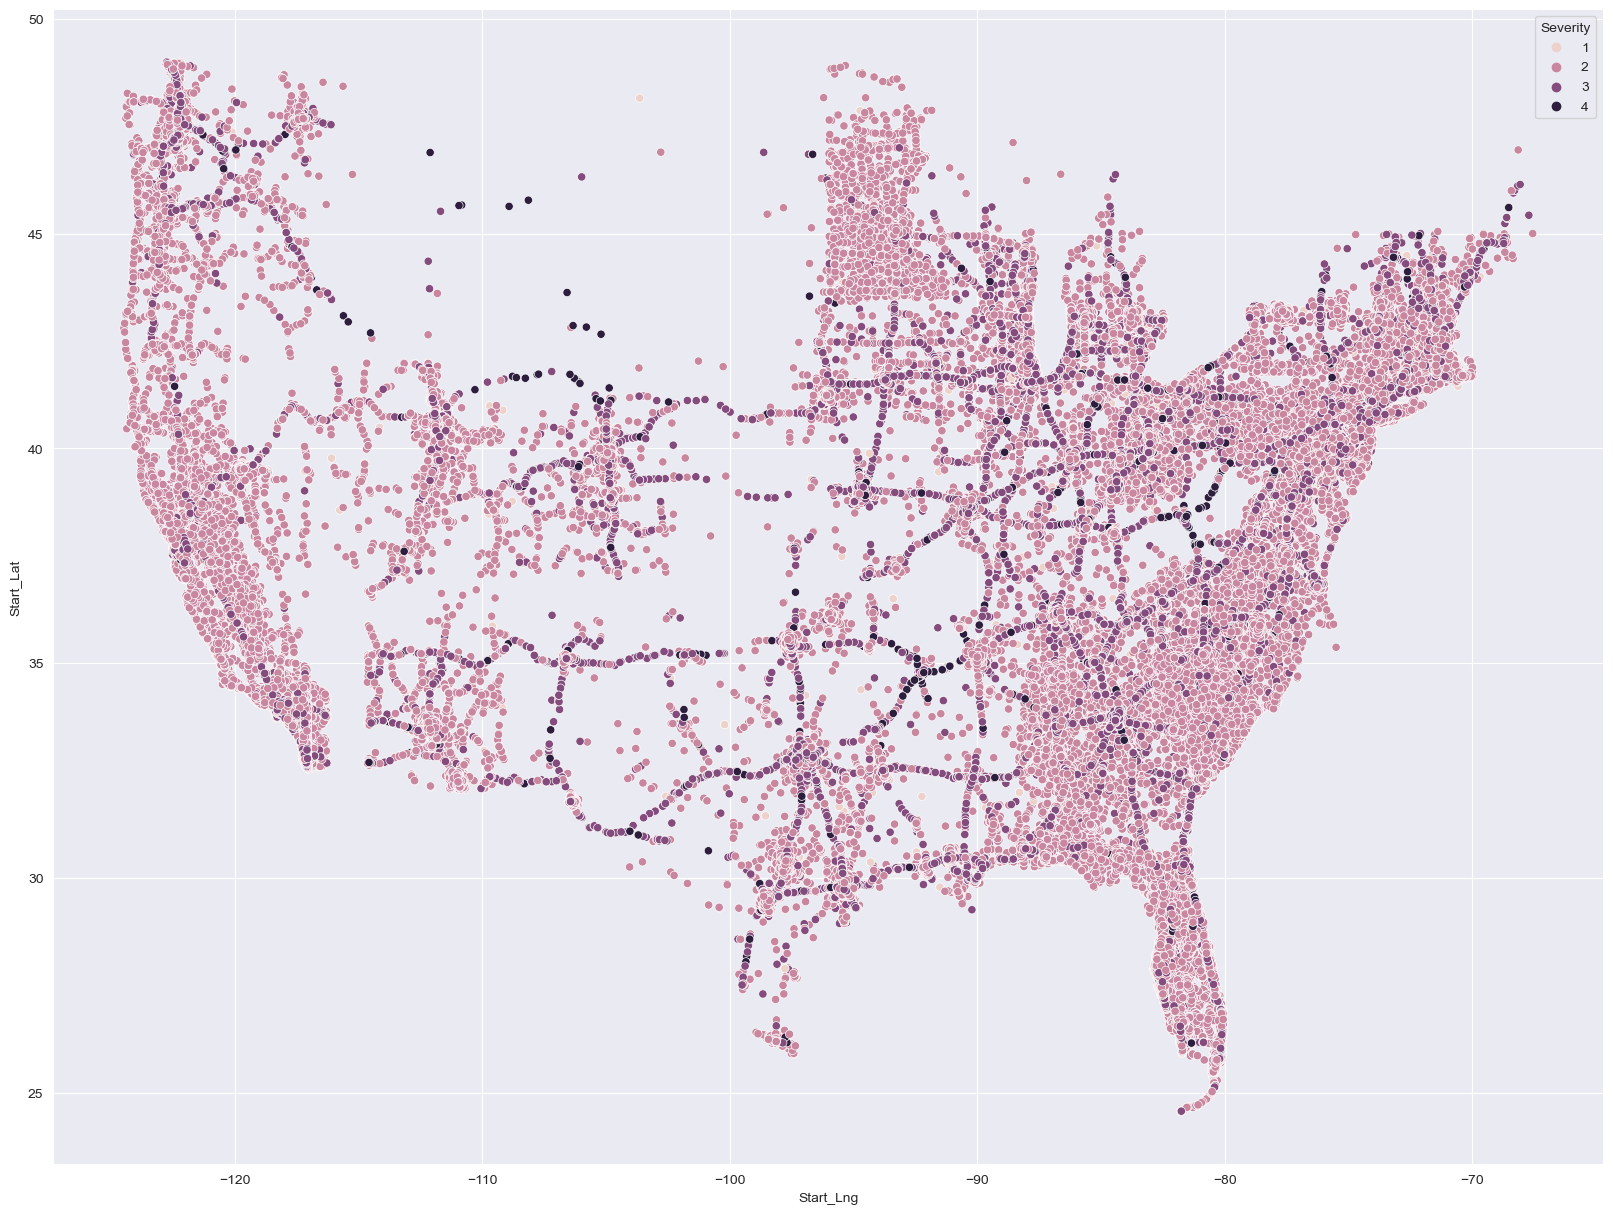

In [84]:
plt.figure(figsize=(20,15))
sns.scatterplot(y=df.Start_Lat, x=df.Start_Lng, hue=df.Severity)

In [89]:
df.State.value_counts()[:25]

State
CA    360495
TX    180138
FL    156168
SC     97509
NY     69125
PA     69111
IL     63588
NC     59934
GA     49154
MI     49037
VA     42957
OH     42277
AL     37214
TN     34372
MA     32491
WA     31149
AZ     27699
LA     26968
NJ     24794
MD     23282
OK     20618
MN     18391
CO     15964
MO     15665
UT     14194
Name: count, dtype: int64

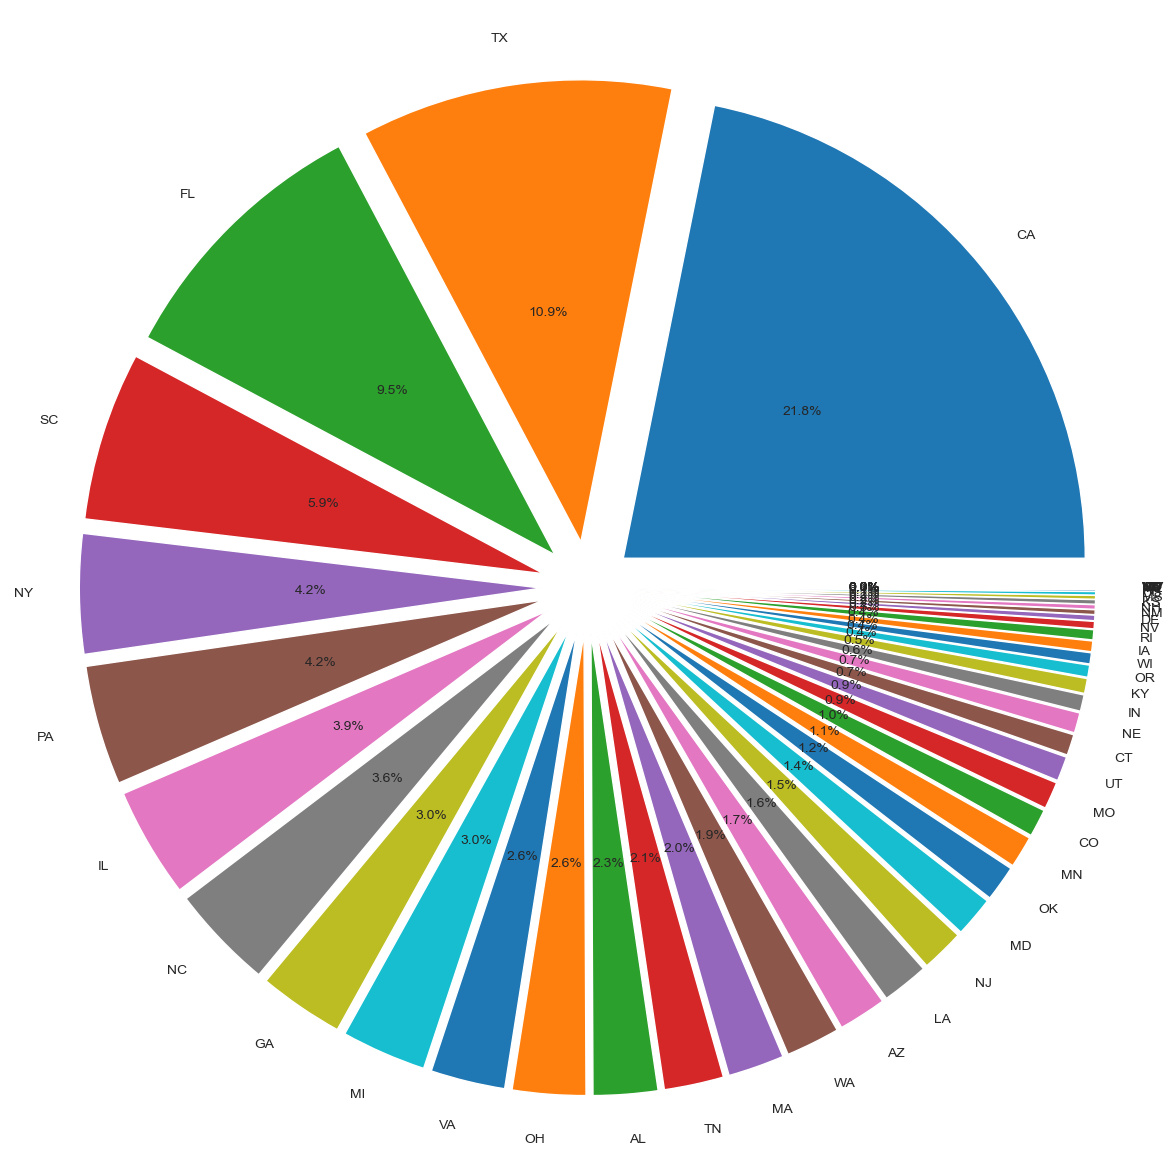

In [94]:
pie, ax = plt.subplots(figsize=[15,15])
labels = df.State.value_counts().keys()
plt.pie(x=df.State.value_counts(), autopct="%.1f%%", explode=[0.1]*len(df.State.value_counts()),labels=labels, pctdistance=0.5)
plt.show()

In [95]:
list(zip(list(df.Start_Lat), list(df.Start_Lng)))

[(39.865147, -84.058723),
 (39.92805900000001, -82.831184),
 (39.063148, -84.032608),
 (39.747753, -84.20558199999998),
 (39.627781, -84.188354),
 (40.10059, -82.92519399999998),
 (39.758274, -84.23050699999997),
 (39.770382, -84.194901),
 (39.778061, -84.172005),
 (40.10059, -82.92519399999998),
 (39.952812, -83.119293),
 (39.932709, -82.83091),
 (39.737633, -84.14993299999998),
 (39.79076, -84.241547),
 (39.972038, -82.913521),
 (39.745888, -84.17041),
 (39.748329, -84.224007),
 (39.752174, -84.239952),
 (39.740669, -84.184135),
 (39.790703, -84.244461),
 (40.052509, -82.88233199999998),
 (39.773346, -84.224686),
 (39.628288, -84.226151),
 (40.023487, -82.994888),
 (39.761379, -84.25921600000002),
 (40.158024, -82.641762),
 (39.733219, -84.159653),
 (39.775303, -84.200523),
 (39.789322, -84.23910500000002),
 (39.75872, -84.183762),
 (40.081459, -83.122398),
 (39.83321, -84.112946),
 (40.042725, -82.99730699999998),
 (39.974415, -82.848854),
 (39.994766, -83.02449),
 (40.006477, -83.0

In [96]:
import random

In [97]:
df_sample = df.sample(10000)

In [98]:
df_sample.Start_Lat

1189709    41.765285
1437468    37.605774
800932     34.329815
1332467    29.860485
861741     36.506920
             ...    
393086     32.843952
524576     30.260691
192104     42.386120
1301879    35.327938
1634557    29.490360
Name: Start_Lat, Length: 10000, dtype: float64

In [99]:
df.columns

Index(['ID', 'Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat',
       'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Description',
       'Street', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [100]:
df['Visibility(mi)']

0          10.0
1          10.0
2          10.0
3           9.0
4           6.0
           ... 
1651114    10.0
1651115    10.0
1651116    10.0
1651117    10.0
1651118     NaN
Name: Visibility(mi), Length: 1651119, dtype: float64

In [101]:
df['Visibility(mi)'].value_counts()

Visibility(mi)
10.0    1300842
7.0       50036
9.0       42700
8.0       35290
5.0       31904
         ...   
19.0          1
0.6           1
1.4           1
1.9           1
45.0          1
Name: count, Length: 68, dtype: int64

In [103]:
df[(df.Severity == 4) & (df['Visibility(mi)'] <= 10)]

ID   Source  Severity          Start_Time  \
619          A-620  Source2         4 2016-03-11 13:18:48   
1197        A-1198  Source2         4 2016-06-24 22:28:49   
1901        A-1902  Source2         4 2016-07-01 14:09:13   
4143        A-4144  Source2         4 2016-07-25 14:23:33   
4964        A-4965  Source2         4 2016-08-01 07:44:37   
...            ...      ...       ...                 ...   
1649958  A-1659812  Source2         4 2020-02-20 10:21:11   
1650272  A-1660126  Source2         4 2020-02-20 17:07:39   
1650638  A-1660492  Source2         4 2020-02-21 05:26:24   
1650802  A-1660656  Source2         4 2020-02-21 18:14:14   
1651009  A-1660863  Source2         4 2020-02-21 14:50:14   

                    End_Time  Start_Lat   Start_Lng  End_Lat  End_Lng  \
619      2016-03-11 13:48:48  39.917412  -83.014236      NaN      NaN   
1197     2016-06-24 22:58:49  37.321117 -121.899887      NaN      NaN   
1901     2016-07-01 14:39:13  37.630623 -122.435043      NaN      NaN   
4143     2016-07-25 15:11:13  37.339115 -121.851807      NaN      NaN   
4964     2016-08-01 08:29:37  37.710648 -122.166687      NaN      NaN   
...                      ...        ...         ...      ...      ...   
1649958  2020-02-20 12:06:38  28.574940  -99.198296      NaN      NaN   
1650272  2020-02-20 18:33:00  37.725269 -121.942177      NaN      NaN   
1650638  2020-02-21 06:25:11  40.765339  -73.839661      NaN      NaN   
1650802  2020-02-21 20:13:03  40.068729  -80.900787      NaN      NaN   
1651009  2020-02-21 16:19:49  37.232819  -80.237923      NaN      NaN   

         Distance(mi)  ... Roundabout Station   Stop Traffic_Calming  \
619          0.010000  ...      False   False  False           False   
1197         0.000000  ...      False   False  False           False   
1901         0.000000  ...      False   False  False           False   
4143         0.000000  ...      False   False  False           False   
4964         0.000000  ...      False   False  False           False   
...               ...  ...        ...     ...    ...             ...   
1649958      7.050000  ...      False   False  False           False   
1650272      4.410000  ...      False   False  False           False   
1650638      0.000000  ...      False   False  False           False   
1650802      2.940000  ...      False   False  False           False   
1651009     16.870001  ...      False   False  False           False   

        Traffic_Signal Turning_Loop Sunrise_Sunset Civil_Twilight  \
619              False        False            Day            Day   
1197             False        False          Night          Night   
1901             False        False            Day            Day   
4143             False        False            Day            Day   
4964             False        False            Day            Day   
...                ...          ...            ...            ...   
1649958          False        False            Day            Day   
1650272          False        False            Day            Day   
1650638          False        False          Night          Night   
1650802          False        False          Night            Day   
1651009          False        False            Day            Day   

        Nautical_Twilight Astronomical_Twilight  
619                   Day                   Day  
1197                Night                 Night  
1901                  Day                   Day  
4143                  Day                   Day  
4964                  Day                   Day  
...                   ...                   ...  
1649958               Day                   Day  
1650272               Day                   Day  
1650638             Night                   Day  
1650802               Day                   Day  
1651009               Day                   Day  

[9445 rows x 46 columns]

In [104]:
(len(df[(df['Visibility(mi)'] <= 2) & (df['Severity'] == 4)]) / len(df) ) * 100

0.03125153305122162

In [108]:
(len(df[df['Visibility(mi)'] <= 2])  / len(df))  * 100

4.333303656489932

In [110]:
weather = df.Weather_Condition.value_counts()

In [111]:
weather[weather > 1000]

Weather_Condition
Fair                            519146
Mostly Cloudy                   220461
Clear                           208905
Cloudy                          181890
Partly Cloudy                   148004
Overcast                         80265
Light Rain                       76599
Scattered Clouds                 47595
Fog                              23119
Light Snow                       19362
Rain                             17792
Haze                             14841
Heavy Rain                        6887
Fair / Windy                      6598
Light Drizzle                     4842
T-Storm                           4176
Smoke                             3650
Thunder in the Vicinity           3358
Mostly Cloudy / Windy             3288
Cloudy / Windy                    3261
Light Rain with Thunder           3131
Thunder                           2695
Heavy T-Storm                     2270
Wintry Mix                        2038
Snow                              2007
Partly 

In [113]:
import matplotlib.pyplot as plt

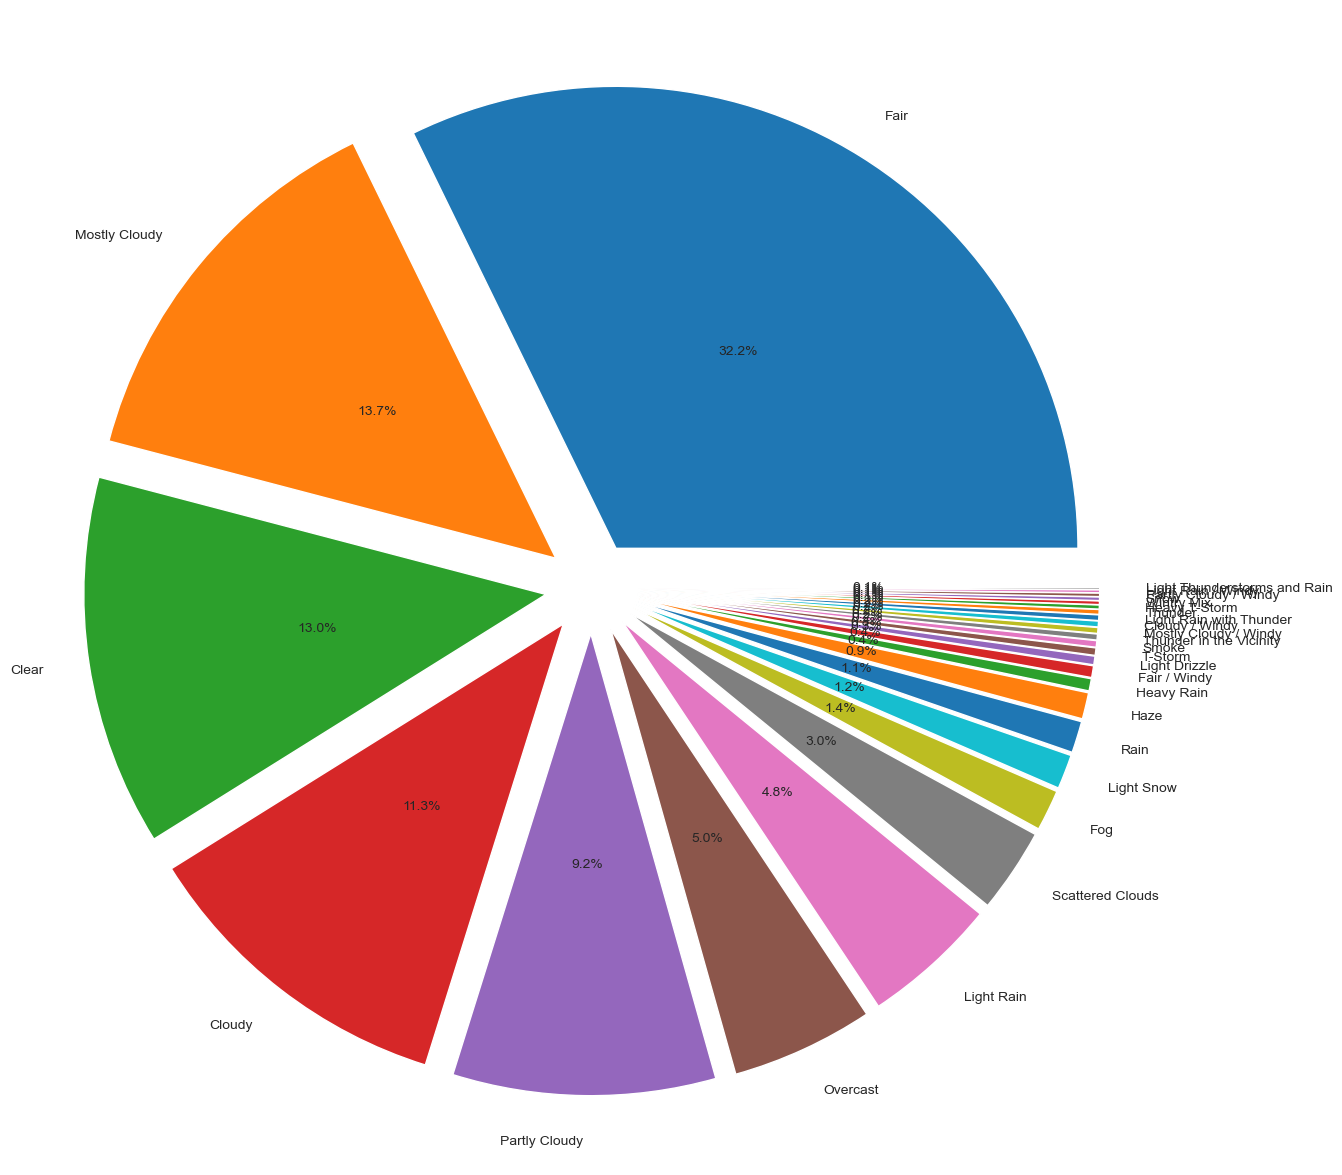

In [116]:
pie, ax = plt.subplots(figsize=[15,15])
labels = weather[weather > 1000].keys()
plt.pie(x=weather[weather > 1000], autopct = "%.1f%%", explode=[0.1]*len(weather[weather > 1000]), labels=labels, pctdistance=0.5)
plt.show()

In [117]:
df['Temperature(F)']

0          36.9
1          37.9
2          36.0
3          35.1
4          36.0
           ... 
1651114    38.0
1651115    39.0
1651116    36.0
1651117    37.0
1651118     NaN
Name: Temperature(F), Length: 1651119, dtype: float64

In [118]:
df['Temperature(F)'].value_counts()

Temperature(F)
 73.0     40508
 77.0     40136
 68.0     39420
 72.0     38177
 75.0     36708
          ...  
-2.4          1
 100.8        1
 5.4          1
 9.9          1
 132.8        1
Name: count, Length: 716, dtype: int64

In [119]:
temperature = df['Temperature(F)'].value_counts()

In [121]:
temperature.index

Index([ 73.0,  77.0,  68.0,  72.0,  75.0,  70.0,  63.0,  64.0,  66.0,  59.0,
       ...
       104.7, 112.8,   5.2, 102.4, 110.8,  -2.4, 100.8,   5.4,   9.9, 132.8],
      dtype='float64', name='Temperature(F)', length=716)

In [123]:
temperature.values

array([40508, 40136, 39420, 38177, 36708, 36596, 34340, 33879, 33386,
       33234, 31861, 31632, 29052, 27578, 27130, 26809, 26527, 26304,
       23946, 22627, 21642, 21620, 21403, 21147, 20040, 19988, 19828,
       19714, 19280, 19014, 18540, 17807, 17366, 17060, 16945, 16414,
       16246, 16139, 15856, 15334, 14418, 13979, 13947, 13592, 13255,
       12813, 12740, 12529, 12243, 12178, 11765, 10614, 10518, 10203,
        9794,  9756,  8995,  8848,  8786,  8780,  8594,  8448,  8406,
        8384,  8333,  8269,  8203,  8103,  8046,  7966,  7654,  7518,
        7496,  7090,  6795,  6788,  6754,  6240,  5513,  5481,  5385,
        5364,  5353,  5225,  5208,  5025,  4813,  4784,  4640,  4638,
        4524,  4521,  4490,  4318,  4032,  3930,  3897,  3880,  3820,
        3819,  3771,  3676,  3653,  3509,  3430,  3351,  3183,  3182,
        3103,  2776,  2776,  2656,  2519,  2516,  2468,  2453,  2404,
        2389,  2330,  2305,  2169,  2071,  2037,  1961,  1932,  1889,
        1882,  1814,

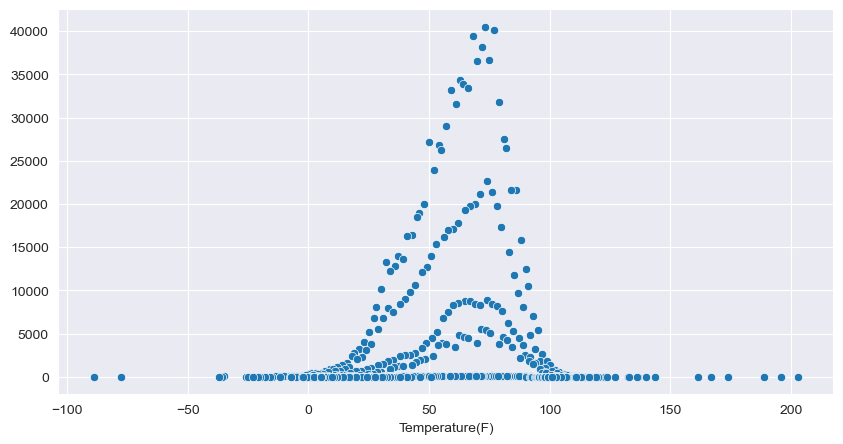

In [124]:
plt.figure(figsize=(10,5))
sns.scatterplot(x=temperature.index, y=temperature.values)
plt.show()

In [125]:
df.Sunrise_Sunset.value_counts()

Sunrise_Sunset
Day      1196273
Night     453197
Name: count, dtype: int64

In [131]:
df.columns

Index(['ID', 'Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat',
       'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Description',
       'Street', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [132]:
amenity = df.Amenity.groupby(df.Severity).value_counts()
amenity

Severity  Amenity
1         False        37806
          True           772
2         False      1031388
          True         19130
3         False       550781
          True          1476
4         False         9755
          True            10
Name: count, dtype: int64

In [133]:
amenity.index

MultiIndex([(1, False),
            (1,  True),
            (2, False),
            (2,  True),
            (3, False),
            (3,  True),
            (4, False),
            (4,  True)],
           names=['Severity', 'Amenity'])

In [134]:
no_exit = df.No_Exit.groupby(df.Severity).value_counts()
no_exit

Severity  No_Exit
1         False        38394
          True           184
2         False      1047379
          True          3139
3         False       551654
          True           603
4         False         9761
          True             4
Name: count, dtype: int64

In [135]:
railway = df.Railway.groupby(df.Severity).value_counts()
railway

Severity  Railway
1         False        38082
          True           496
2         False      1039443
          True         11075
3         False       548335
          True          3922
4         False         9740
          True            25
Name: count, dtype: int64

In [146]:
traffic_calming = df.Traffic_Calming.groupby(df.Severity).value_counts()
traffic_calming

Severity  Traffic_Calming
1         False                38532
          True                    46
2         False              1049473
          True                  1045
3         False               551805
          True                   452
4         False                 9763
          True                     2
Name: count, dtype: int64

In [137]:
stop = df.Stop.groupby(df.Severity).value_counts()
stop

Severity  Stop 
1         False      36666
          True        1912
2         False    1005590
          True       44928
3         False     549309
          True        2948
4         False       9745
          True          20
Name: count, dtype: int64

In [138]:
traffic_signal = df.Traffic_Signal.groupby(df.Severity).value_counts()
traffic_signal

Severity  Traffic_Signal
1         False              25772
          True               12806
2         False             754112
          True              296406
3         False             519636
          True               32621
4         False               9521
          True                 244
Name: count, dtype: int64

In [139]:
bump = df.Bump.groupby(df.Severity).value_counts()
bump

Severity  Bump 
1         False      38563
          True          15
2         False    1050138
          True         380
3         False     552077
          True         180
4         False       9764
          True           1
Name: count, dtype: int64

In [140]:
crossing = df.Crossing.groupby(df.Severity).value_counts()
crossing

Severity  Crossing
1         False        30069
          True          8509
2         False       861643
          True        188875
3         False       534991
          True         17266
4         False         9647
          True           118
Name: count, dtype: int64

In [141]:
give_way = df.Give_Way.groupby(df.Severity).value_counts()
give_way

Severity  Give_Way
1         False         38267
          True            311
2         False       1042283
          True           8235
3         False        550354
          True           1903
4         False          9749
          True             16
Name: count, dtype: int64

In [142]:
df.Turning_Loop.value_counts()

Turning_Loop
False    1651118
Name: count, dtype: int64

<Axes: title={'center': 'Railway'}, xlabel='Severity'>

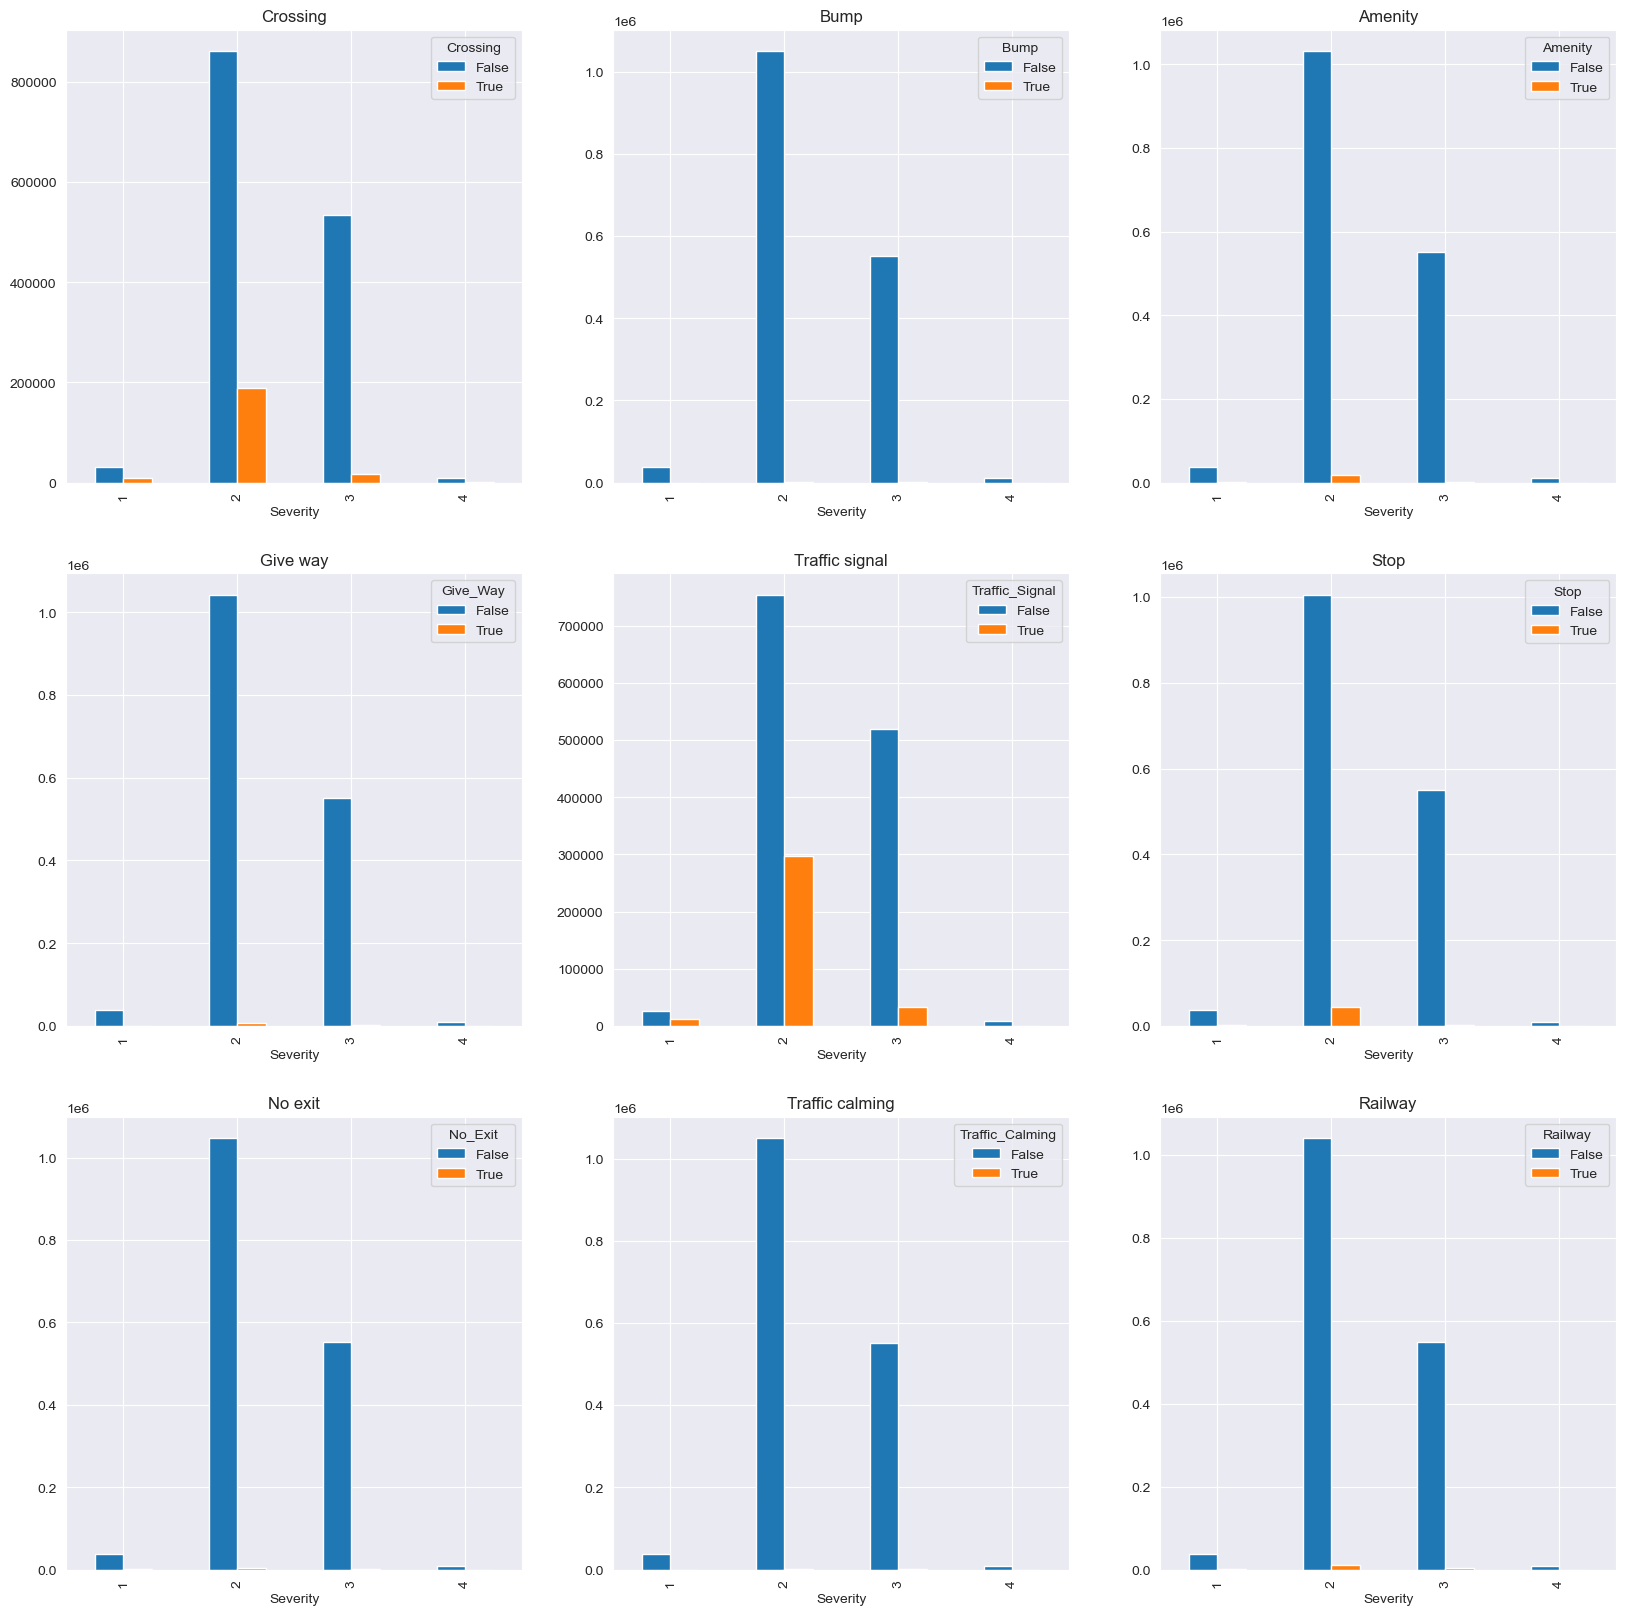

In [147]:
fig, ax = plt.subplots(3,3, figsize=(20, 20))

crossing.unstack().plot(kind='bar', ax=ax[0,0], title="Crossing")
bump.unstack().plot(kind='bar', ax=ax[0,1], title="Bump")
amenity.unstack().plot(kind='bar', ax=ax[0,2], title="Amenity")
give_way.unstack().plot(kind='bar', ax=ax[1,0], title="Give way")
traffic_signal.unstack().plot(kind='bar', ax=ax[1,1], title="Traffic signal")
stop.unstack().plot(kind='bar', ax=ax[1,2], title="Stop")
no_exit.unstack().plot(kind='bar', ax=ax[2,0], title="No exit")
traffic_calming.unstack().plot(kind='bar', ax=ax[2,1], title="Traffic calming")
railway.unstack().plot(kind='bar', ax=ax[2,2], title="Railway")

In [151]:
null_cols = [i for i in df.columns if df[i].isnull().any()]
print(null_cols)

['End_Lat', 'End_Lng', 'Description', 'Street', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone', 'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity', 'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight']


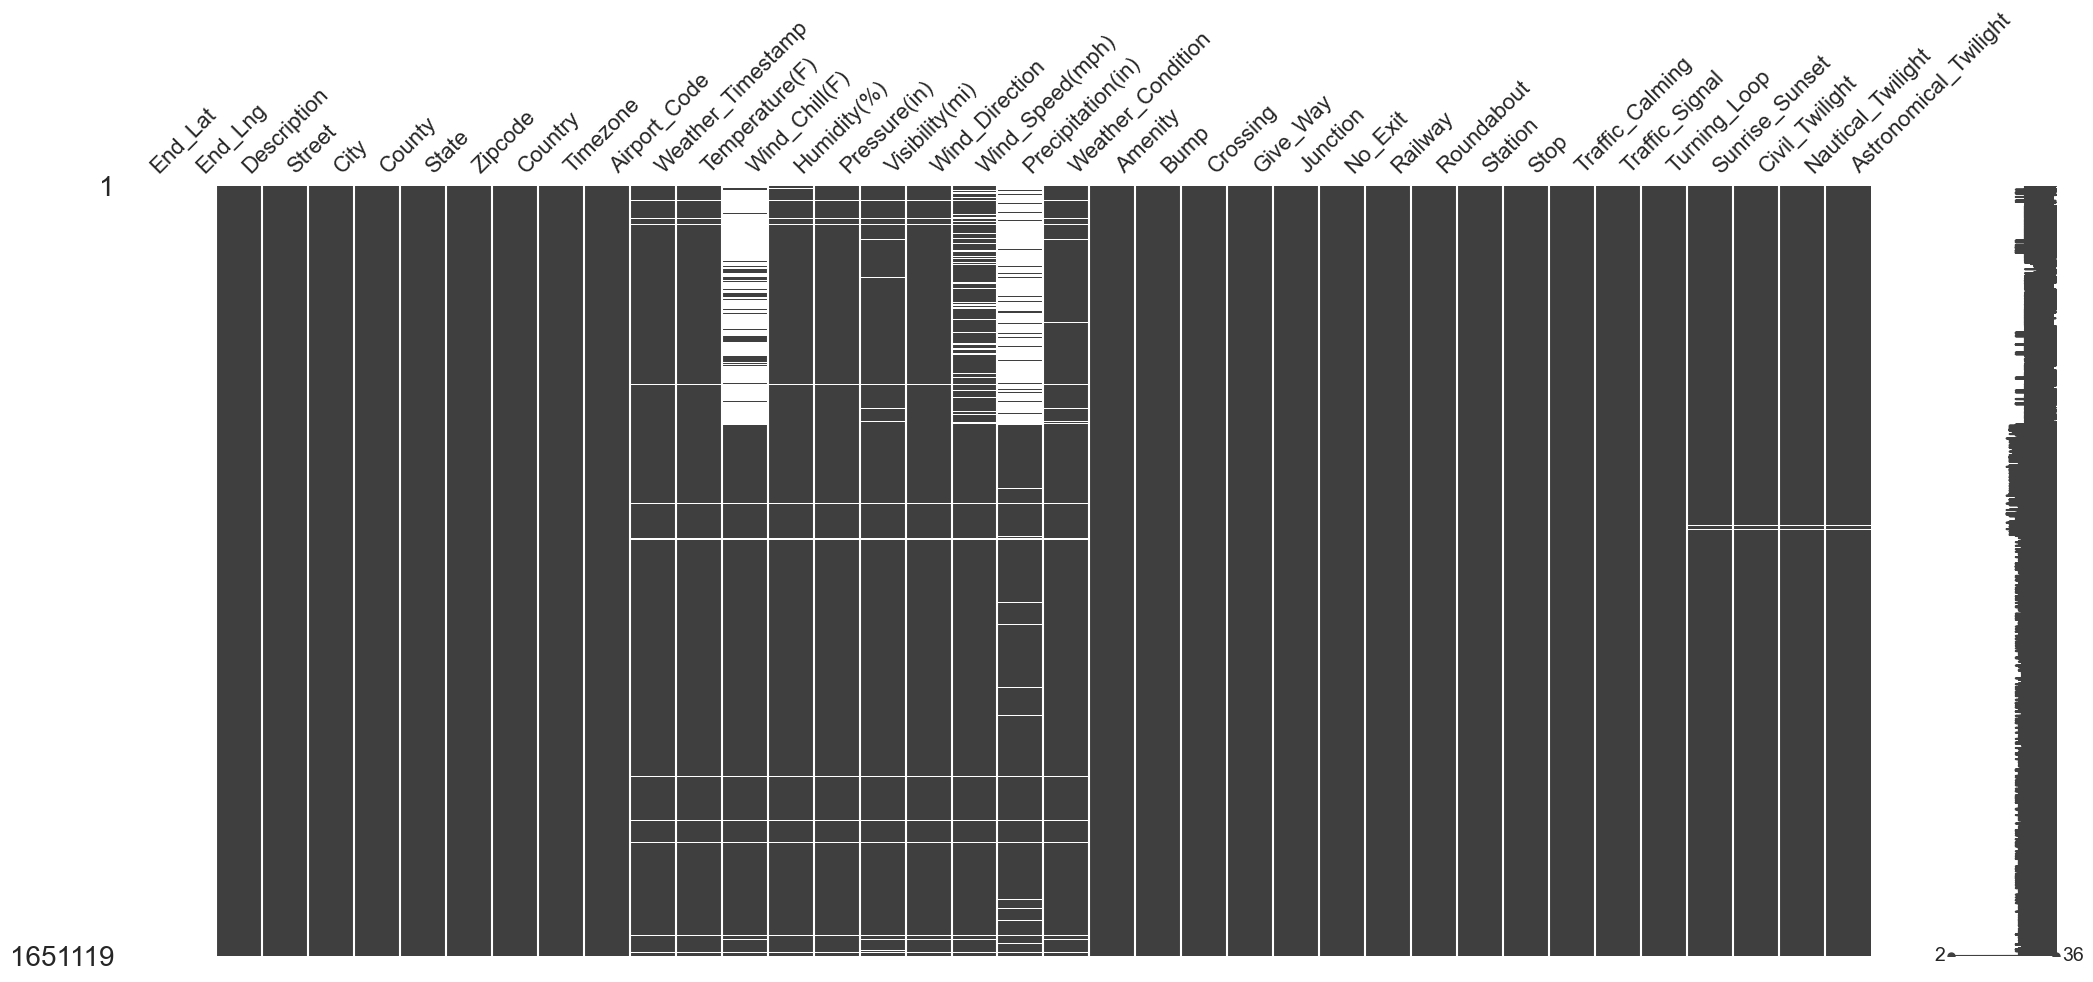

In [155]:
mn.matrix(df[null_cols]);